## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

%matplotlib inline 

## Importing the dataset

In [2]:
#Importing the data 

chocolate = pd.read_csv("C:\\Users\\essie\\Downloads\\chocolate_bars.csv",
                        index_col = 'id')

In [3]:
chocolate

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
id,,,,,,,,,,
2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...
1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00


## Checking and cleaning the data 
1. Checking the shape of the dataframe
2. Generate an overview of the dataframe
3. Checking the data for null values
4. Check if the rows are duplicated in the dataframe

In [4]:
chocolate.shape

(2530, 10)

In [5]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 2454 to 2170
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      2530 non-null   object 
 1   company_location  2530 non-null   object 
 2   year_reviewed     2530 non-null   int64  
 3   bean_origin       2530 non-null   object 
 4   bar_name          2530 non-null   object 
 5   cocoa_percent     2530 non-null   float64
 6   num_ingredients   2443 non-null   float64
 7   ingredients       2443 non-null   object 
 8   review            2530 non-null   object 
 9   rating            2530 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 217.4+ KB


### comment
num_ingredients" and "ingredients" contains null values

In [6]:
chocolate.isnull().sum()

manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [7]:
chocolate.duplicated().sum()

0

## Challenges answers

In [8]:
#Question 1
# What is the average rating by country of origin?
chocolate.groupby('bean_origin').rating.mean()
chocolate.groupby('bean_origin').rating.mean().sort_values(ascending = False)

bean_origin
Tobago                   3.625000
China                    3.500000
Sao Tome & Principe      3.500000
Solomon Islands          3.450000
Congo                    3.318182
                           ...   
Sierra Leone             2.750000
St.Vincent-Grenadines    2.750000
Principe                 2.750000
Martinique               2.750000
Puerto Rico              2.714286
Name: rating, Length: 62, dtype: float64

In [9]:
#Question 2
#How many bars were reviewed for each of those countries?
chocolate.groupby('bean_origin').bar_name.count()

bean_origin
Australia      3
Belize        76
Blend        156
Bolivia       80
Brazil        78
            ... 
U.S.A.        33
Uganda        19
Vanuatu       13
Venezuela    253
Vietnam       73
Name: bar_name, Length: 62, dtype: int64

<Figure size 1440x360 with 0 Axes>

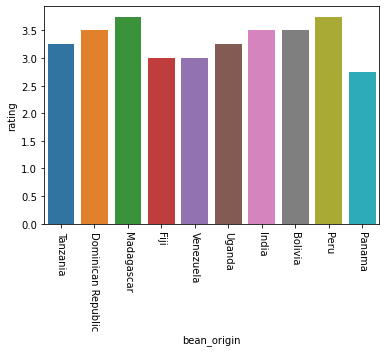

<Figure size 1440x360 with 0 Axes>

In [10]:
#Question 3
# Create plots to visualize findings for questions 1 and 2
chocolate['mean_rating'] = chocolate['rating'].mean()
chocolate 
vizil = sns.barplot(x= 'bean_origin', y='rating', data=chocolate[0:10])
vizil.set_xticklabels(vizil.get_xticklabels(), rotation = -90);
plt.figure(figsize=(20,5))

## comment
This just shows the visualization for the first 10 countries which doesnt really tell us much on our data.

In [11]:
# Visualization for the countries with highest average ratings.
choc = pd.DataFrame(chocolate.groupby('bean_origin').rating.mean().sort_values
                    (ascending = False))
choc['bean_origin'] = choc.index
choc                  

,rating,bean_origin
bean_origin,,
Tobago,3.625000,Tobago
China,3.500000,China
Sao Tome & Principe,3.500000,Sao Tome & Principe
Solomon Islands,3.450000,Solomon Islands
Congo,3.318182,Congo
...,...,...
Sierra Leone,2.750000,Sierra Leone
St.Vincent-Grenadines,2.750000,St.Vincent-Grenadines
Principe,2.750000,Principe


<Figure size 1440x360 with 0 Axes>

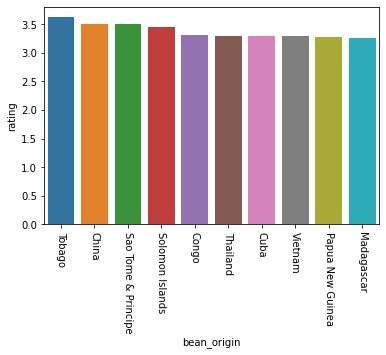

<Figure size 1440x360 with 0 Axes>

In [12]:
vizil = sns.barplot(x= 'bean_origin', y='rating', data=choc[0:10])
vizil.set_xticklabels(vizil.get_xticklabels(), rotation = -90);
plt.figure(figsize=(20,5))

## comment

This visualization shows the top ten countrieswith the highest average rating of chocolates ; Tobago, China, Sao Tome and principe, Solomon Islands, Congo, Thailand, Cuba, Vietnam, Papua New Guines and Madagascar.

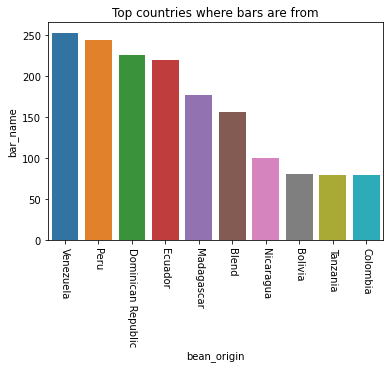

In [13]:
e = pd.DataFrame(chocolate.groupby('bean_origin')['bar_name'].count().
                 sort_values(ascending=False))
e['bean_origin'] = e.index
vizil2 = sns.barplot(x= 'bean_origin', y='bar_name', data=e[0:10])
vizil2.set_title('Top countries where bars are from')
vizil2.set_xticklabels(vizil2.get_xticklabels(), rotation = -90);

## comment
A visualization of the top 10 countries with the highest number of bars reviewed; Highest numbers of bars were reviewed for the country Venezulea

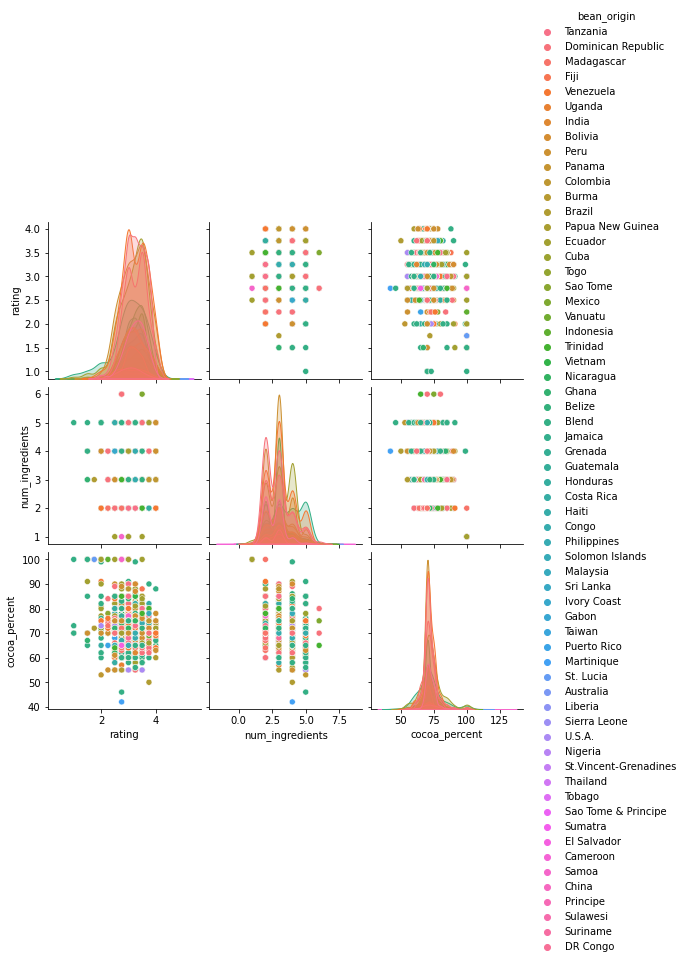

In [14]:
choc = pd.read_csv('chocolate_bars.csv')
sns.pairplot(choc,hue = 'bean_origin', vars=['rating', 'num_ingredients', 'cocoa_percent'])

Text(0.5, 1.0, 'Relationship between Cocoa content and Rating')

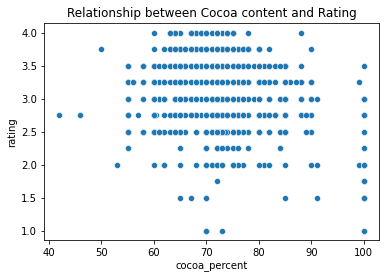

In [15]:
vizil3 = sns.scatterplot(x='cocoa_percent', y='rating', data=choc)
vizil3.set_title('Relationship between Cocoa content and Rating')

In [21]:
correlation_XY = choc['cocoa_percent'].corr(choc['rating'])
print(f'The correlation between cocoa_percent and rating is {round(correlation_XY,2)}')

The correlation between cocoa_percent and rating is -0.15


In [23]:
#QUESTION 5
ave = (choc[choc['rating'] >3.5]). cocoa_percent.mean()
print(f'The average cocoa_percent for bars with higher rating is {round(ave,2)}%')

#finding the average cocoa contents with bars having ratings > 3.5 

The average cocoa_percent for bars with higher rating is 70.95%


## comment

This data does not show any clear correlation between the percentage of cocoa in a chocolate bar and rating of the chocolate bar

In [17]:
#Question 6
bar_Lecithin = ['L']
c = choc.dropna(axis=0)
ave_Lecithin = c[c['ingredients'].str.contains('L')].rating.mean()
print(ave_Lecithin)
ave_no_lecithin = c[~c['ingredients'].str.contains('L')].rating.mean()
print(ave_no_lecithin)

3.150608519269777
3.2251282051282053


### comment
The average rating of bars without lecithin is 3.23 points  
the average rating of bars with lecithin is 3.15
The average rating of bars without lecithin is
more than the average rating of bars with lecithin

## Summary of Findings

1. There are more chocolate bars with rating greater than 3.
2. Most of the cholocolate bars have 3 ingredients.
3. Average rating of the chocolate bar is highest for the country Tobago
4. Highest numbers of bars were reviewed for the country Venezulea
5. Cocoa bean's origin is not an indicator of quality
6. The average rating of bars without lecithin is more than the average rating of bars with lecithin